In [9]:
import cv2
import numpy as np
import os
from ultralytics import YOLO
from IPython.display import display, Image

In [10]:
# Load YOLOv8 model with custom dataset
model = YOLO(r"C:\Users\asus\Downloads\SawitPRO\model clasify apple.pt")  

# Load image
image_path = (r"C:\Users\asus\Downloads\SawitPRO\ai_assignment_20230726_classify.jpeg")
image = cv2.imread(image_path)

In [11]:
# Perform detection
results = model(image)

def classify_color(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    color_ranges = {
        "red": [(np.array([0, 120, 70]), np.array([10, 255, 255])),
                 (np.array([170, 120, 70]), np.array([180, 255, 255]))],
        "yellow": [(np.array([20, 150, 150]), np.array([35, 255, 255]))],
        "green": [(np.array([36, 100, 100]), np.array([85, 255, 255]))]
    }
    
    scores = {color: sum(np.sum(cv2.inRange(hsv, lower, upper)) for lower, upper in ranges)
              for color, ranges in color_ranges.items()}
    
    return max(scores, key=scores.get) if max(scores.values()) > 0 else "unknown"


0: 640x800 2 Greens, 12 Reds, 8 Yellows, 716.5ms
Speed: 9.2ms preprocess, 716.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 800)


In [12]:
# Create output directories
output_dirs = {color: os.makedirs(color + "_apples", exist_ok=True) for color in ["red", "yellow", "green"]}
count = {"red": 0, "yellow": 0, "green": 0}
detected_images = []

In [13]:
# Process detections
for box in results[0].boxes.xyxy:
    x1, y1, x2, y2 = map(int, box)
    cropped_apple = image[y1:y2, x1:x2]
    color = classify_color(cropped_apple)
    
    if color in count:
        count[color] += 1
        output_path = os.path.join(f"{color}_apples", f"{color}_{count[color]}.jpg")
        cv2.imwrite(output_path, cropped_apple)
        detected_images.append(output_path)

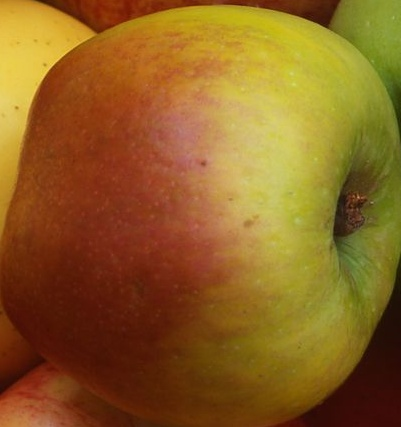

red_1.jpg


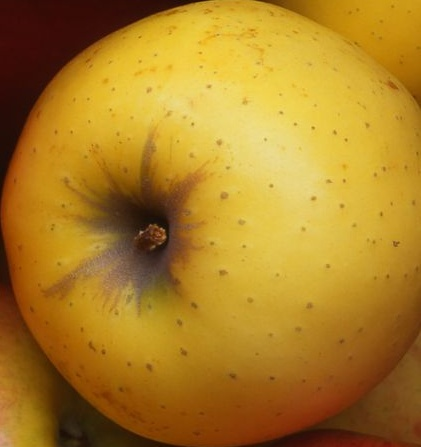

yellow_1.jpg


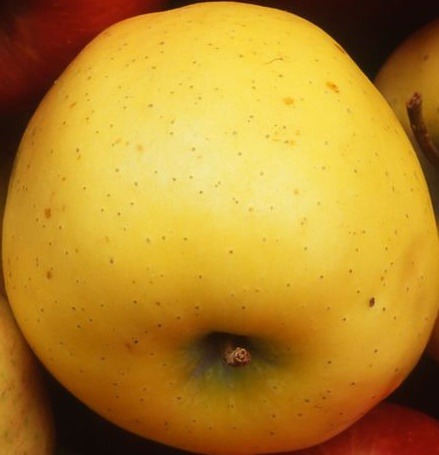

yellow_2.jpg


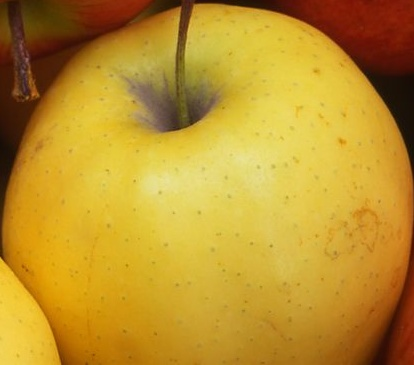

yellow_3.jpg


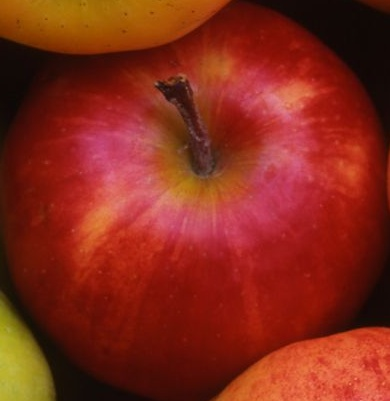

red_2.jpg


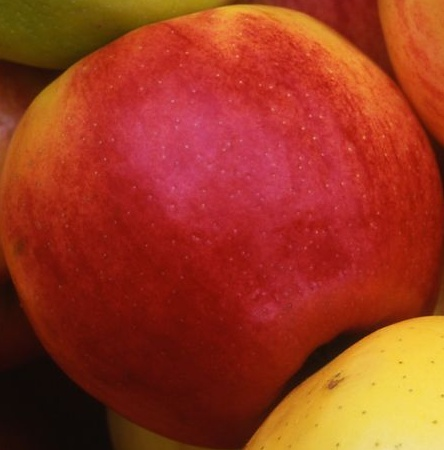

red_3.jpg


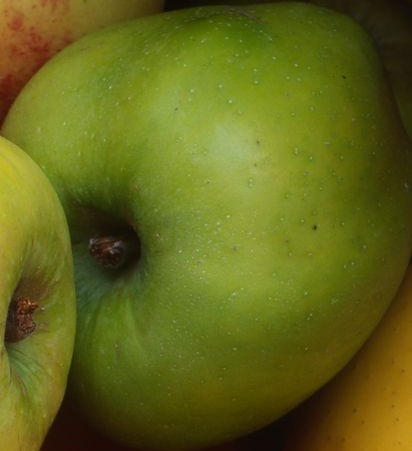

green_1.jpg


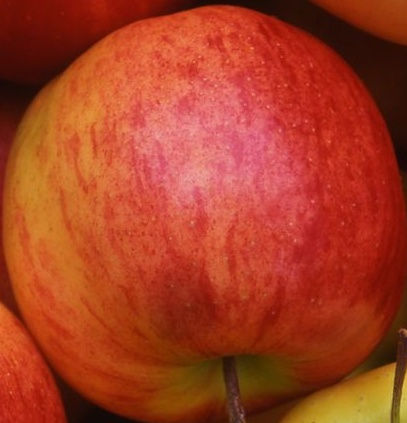

red_4.jpg


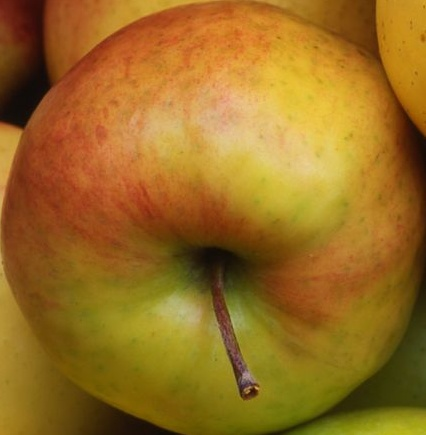

yellow_4.jpg


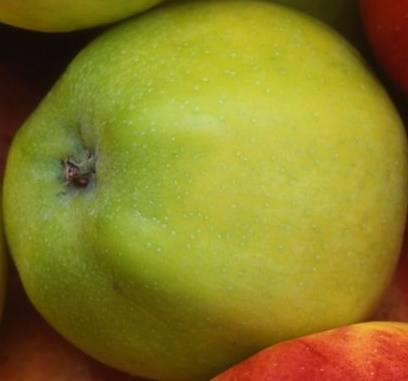

yellow_5.jpg


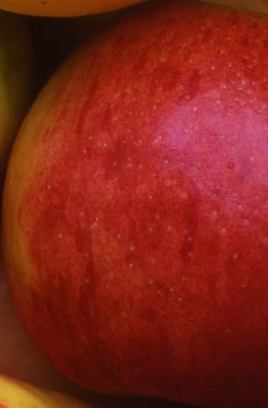

red_5.jpg


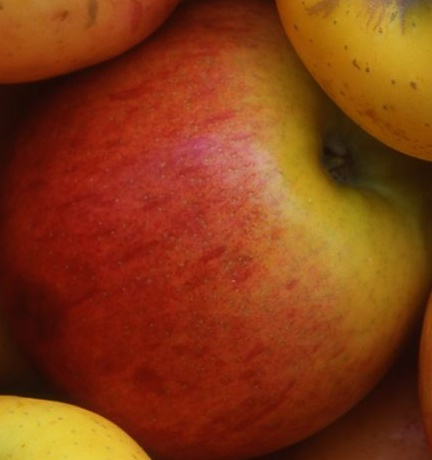

red_6.jpg


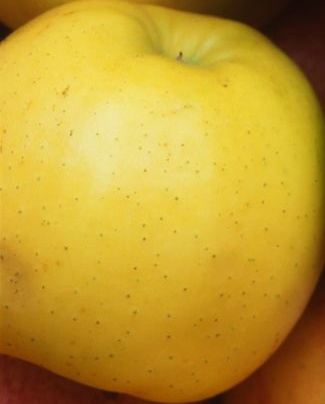

yellow_6.jpg


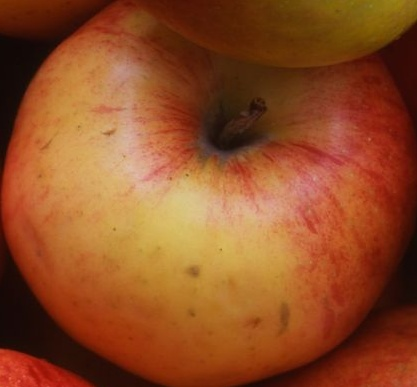

red_7.jpg


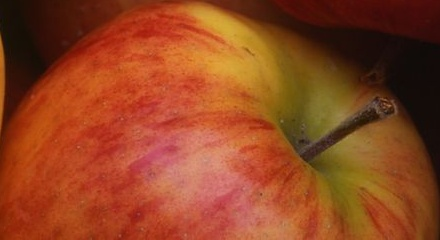

red_8.jpg


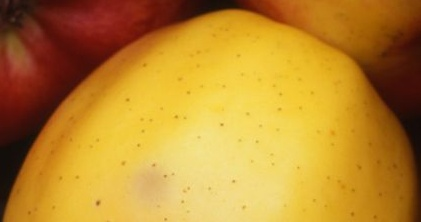

yellow_7.jpg


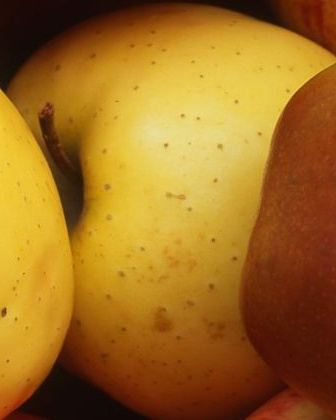

yellow_8.jpg


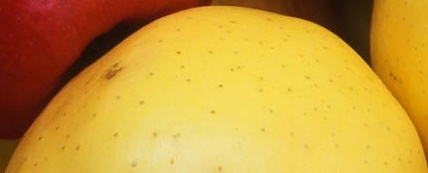

yellow_9.jpg


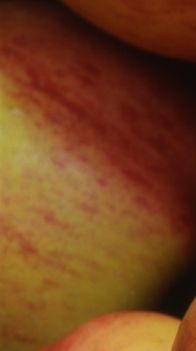

red_9.jpg


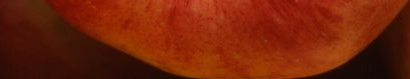

red_10.jpg


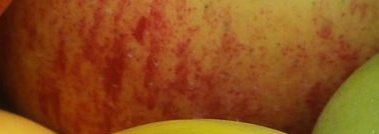

red_11.jpg


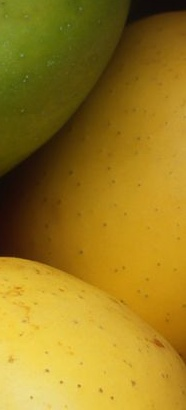

yellow_10.jpg


In [14]:
# Display detected images
for img_path in detected_images:
    display(Image(img_path, width=150))
    print(os.path.basename(img_path))